In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.shape

(144, 2)

In [5]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [6]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

### Converting data in .csv file into time-series data

For time series analysis, we need time component to be the index, instead of a column

So we can parse the data while reading

In [16]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

parse_data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'],
                        index_col='Month', date_parser=dateparse)

parse_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
parse_data.shape

(144, 1)

In [18]:
parse_data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

convert df to Series coz for time series we can work with 1D data with index as time; helps in extraction

In [19]:
ts = parse_data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
ts['1949-05-01']

121

In [13]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [14]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

### TS Data Visualization

Text(0, 0.5, 'Number of Passengers')

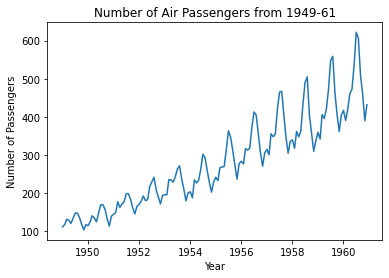

In [20]:
plt.plot(ts)
plt.title('Number of Air Passengers from 1949-61')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

point out upward trend and seasonality

### Plotting year-wise data

It can be helpful to compare line plots for the same interval, i.e. day-to-day, month-to-month, year-to-year

Dataset spans 12 years. Can group data by year and create line plot for direct comparison.

The groups are then enumerated and the observations for each year are stored as columns in a new DF

Finally a plot of this contrived DF is created with each column visualized as a subplot with legends removed to cut back the clutter

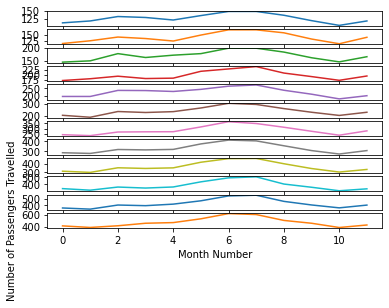

<Figure size 1080x576 with 0 Axes>

In [21]:
from pandas import Grouper

groups = ts.groupby(Grouper(freq='A')) #A indicates annual

years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values #this for loop gives groupby analysis for year
    
years.plot(subplots=True, legend=False)
plt.xlabel('Month Number') 
plt.ylabel('Number of Passengers Travelled')
plt.figure(figsize=(15,8))
plt.show()

From month4 (Apr) till 8 (Aug) seasonality repeated

Each subplot indicates one year

In [22]:
years

,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
0,112,115,145,171,196,204,242,284,315,340,360,417
1,118,126,150,180,196,188,233,277,301,318,342,391
2,132,141,178,193,236,235,267,317,356,362,406,419
3,129,135,163,181,235,227,269,313,348,348,396,461
4,121,125,172,183,229,234,270,318,355,363,420,472
5,135,149,178,218,243,264,315,374,422,435,472,535
6,148,170,199,230,264,302,364,413,465,491,548,622
7,148,170,199,242,272,293,347,405,467,505,559,606
8,136,158,184,209,237,259,312,355,404,404,463,508
9,119,133,162,191,211,229,274,306,347,359,407,461


<AxesSubplot:>

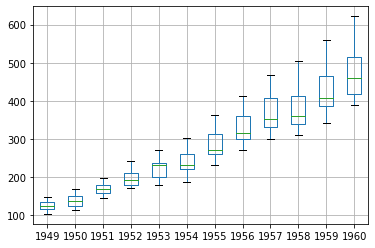

In [23]:
years.boxplot()

Histogram might be useful to show the distribution of the observations themselves

Plot of values without the temporal ordering

Might give an idea of the type of data transform to be performed (sometimes log-transform, squaring, cubing)

See this hist is skewed so might have to log-transform when we go for ARIMA model

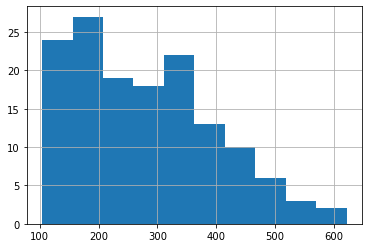

In [24]:
ts.hist()
plt.show()

### Decomposing

Time series decomposition is a mathematical procedure which transforms a time series into multple diff time series. The orginal is often split into three components

1. Seasonal: Patters that repeat with a fixed period of time. eg a website receives more views or clicks in weekends producing a seasonality of 7 days

2. Trend: Underlying trend of metrics. so a website increasing in popularity will show clicks going up

3. Random: 'noise' 'irregular' 'remainder' ie residulas of the original TS after the seasonal and trend components removed

Model trend and seasonality separately and return remaining

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
decompositon = seasonal_decompose(ts)

trend = decompositon.trend
seasonal = decompositon.seasonal
residual = decompositon.resid

The subplot() takes argument as either a 3-digit integer or three separate integers describing posn of the subplot.

If the 3 integers are nrows, ncols, and index in order, the subplot will take the index posn on a grid with nrows rows and ncols columns. index starts at 1 in the upper left corner and increments to the right

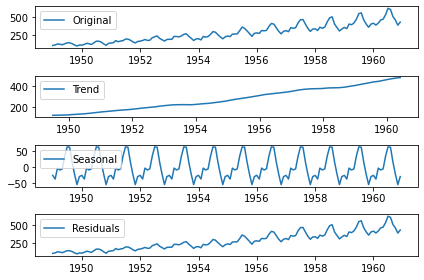

In [29]:
plt.subplot(4,1,1)
plt.plot(ts, label='Original')
plt.legend(loc='best')

plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(4,1,4)
plt.plot(ts, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

Show screenshots

### Moving Averages

In [34]:
data = pd.read_csv('hospital_admissions.csv')

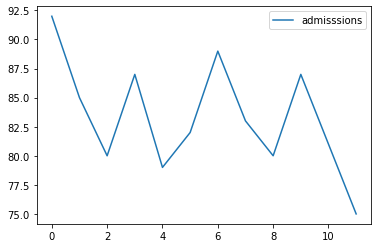

In [35]:
data.plot()
plt.show()

In [36]:
moving_avg = data.rolling(3).mean()
moving_avg

,admisssions
0,NaN
1,NaN
2,85.666667
3,84.000000
4,82.000000
5,82.666667
6,83.333333
7,84.666667
8,84.000000
9,83.333333


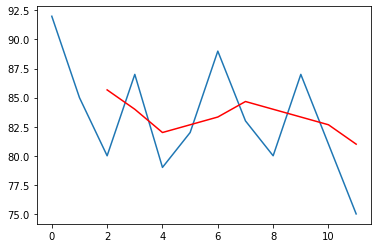

In [37]:
plt.plot(data)
plt.plot(moving_avg, color='red')

In [38]:
diff = data - moving_avg
diff.dropna(inplace=True)

diff

,admisssions
2,-5.666667
3,3.000000
4,-3.000000
5,-0.666667
6,5.666667
7,-1.666667
8,-4.000000
9,3.666667
10,-1.666667
11,-6.000000


In [40]:
arr = np.array(diff['admisssions'])
arr

array([-5.66666667,  3.        , -3.        , -0.66666667,  5.66666667,
       -1.66666667, -4.        ,  3.66666667, -1.66666667, -6.        ])

In [41]:
rmse = np.sqrt(sum(arr**2)/len(arr))
rmse

3.9200340134578786

### Simple Exponential Smoothing

Assume that:

Only random fluctuations

No trend or seasonality

In [42]:
%matplotlib inline

In [43]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [44]:
data = [446.6565, 454.4733, 455.663, 423.6322, 456.2713, 440.5881,
       425.3325, 485.1494, 506.0482, 526.792, 514.2689, 494.211]

index = pd.date_range(start='1996', end='2008', freq='A')

oildata = pd.Series(data, index)

oildata

1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
2001-12-31    440.5881
2002-12-31    425.3325
2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, dtype: float64

Text(0.5, 1.0, 'Oil Production in Saudi Arabia from 1996 to 2007')

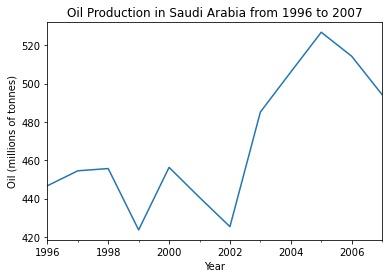

In [45]:
ax = oildata.plot()
ax.set_xlabel('Year')
ax.set_ylabel('Oil (millions of tonnes)')
ax.set_title('Oil Production in Saudi Arabia from 1996 to 2007')

no trend or seasonality

use 2 variants:

fit1 we do not use auto optimization and choose to explicitly provide the model with alpha=0.6 parameter

fit2 we allow statsmodels to automatically find optimized alpha value. recommended

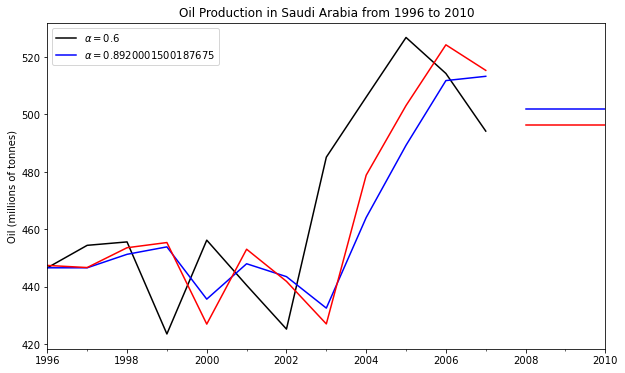

In [49]:
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.6,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.6$')

fit2 = SimpleExpSmoothing(oildata).fit()
fcast2 = fit2.forecast(3).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])

ax = oildata.plot(color='black', figsize=(10,6))
ax.set_ylabel('Oil (millions of tonnes)')
ax.set_title('Oil Production in Saudi Arabia from 1996 to 2010')

fcast1.plot(ax=ax, color='blue', legend=True)
fit1.fittedvalues.plot(ax=ax, color='blue')

fcast2.plot(ax=ax, color='red', legend=True)
fit2.fittedvalues.plot(ax=ax, color='red')

plt.show()

In [50]:
fit1.sse

8098.561206032671

In [51]:
fit2.sse

7573.426361782818

Second better obvs

### Holt's Model

Assume:

Trend and random fluctuations
No seasonality

In [2]:
from statsmodels.tsa.api import Holt

In [3]:
data = [17.5534, 21.86, 23.8866, 26.9293, 26.8885, 28.8314, 30.0751,
       30.9535, 30.1857, 31.5797, 32.5776, 33.4774, 39.0216, 41.3864, 41.5966]

index = pd.date_range(start='1990', end='2005', freq='A')

air = pd.Series(data, index)

air

1990-12-31    17.5534
1991-12-31    21.8600
1992-12-31    23.8866
1993-12-31    26.9293
1994-12-31    26.8885
1995-12-31    28.8314
1996-12-31    30.0751
1997-12-31    30.9535
1998-12-31    30.1857
1999-12-31    31.5797
2000-12-31    32.5776
2001-12-31    33.4774
2002-12-31    39.0216
2003-12-31    41.3864
2004-12-31    41.5966
Freq: A-DEC, dtype: float64

Text(0.5, 1.0, 'Air Pollution from 1990 to 2004')

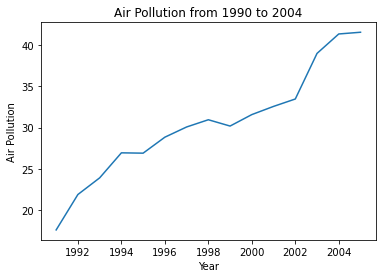

In [4]:
plt.plot(air)
plt.xlabel('Year')
plt.ylabel('Air Pollution')
plt.title('Air Pollution from 1990 to 2004')

trend no seasonality

linear or exponential trend with Holt

fit1 linear model alpha=0.8 and beta=0.2

fit2 exponential model rather than Holt's Additive Model

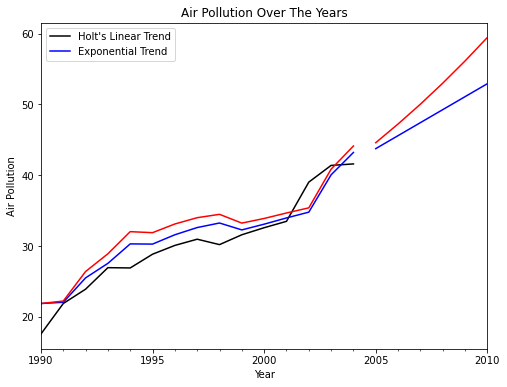

In [6]:
fit1 = Holt(air).fit(smoothing_level=0.8,smoothing_slope=0.2,optimized=False)
fcast1 = fit1.forecast(6).rename("Holt's Linear Trend")

fit2 = Holt(air, exponential=True).fit(smoothing_level=0.8,
                                       smoothing_slope=0.2,optimized=False)
fcast2 = fit2.forecast(6).rename("Exponential Trend")

ax = air.plot(color='black', figsize=(8,6))
plt.xlabel('Year')
plt.ylabel('Air Pollution')
plt.title('Air Pollution Over The Years')

fit1.fittedvalues.plot(ax=ax, color='blue')
fcast1.plot(ax=ax, color='blue', legend=True)

fit2.fittedvalues.plot(ax=ax, color='red')
fcast2.plot(ax=ax, color='red', legend=True)

plt.show()

upward trend in original data from 1990 to 2004 continues in 2005 to 2010

In [7]:
fit1.sse

72.78681528351494

In [8]:
fit2.sse

126.87838867681654

conclude that data follows linear upward trend

### Holt's Winter Model

Assume:
trend, seasonality and random fluctuations

In [9]:
from statsmodels.tsa.api import ExponentialSmoothing

In [10]:
#intl visitor nights in Australia

data = [41.7275, 24.0418, 32.3281, 37.3287, 46.2132, 29.3463, 36.4829,
       42.9777, 48.9015, 31.1802, 37.7179, 40.4202, 51.2069, 31.8872,
       40.9783, 43.7725, 55.5586, 33.8509, 42.0764, 45.6423, 59.7668,
       35.1919, 44.3197, 47.9137]

index = pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')

aust = pd.Series(data, index)

aust

2005-01-01    41.7275
2005-04-01    24.0418
2005-07-01    32.3281
2005-10-01    37.3287
2006-01-01    46.2132
2006-04-01    29.3463
2006-07-01    36.4829
2006-10-01    42.9777
2007-01-01    48.9015
2007-04-01    31.1802
2007-07-01    37.7179
2007-10-01    40.4202
2008-01-01    51.2069
2008-04-01    31.8872
2008-07-01    40.9783
2008-10-01    43.7725
2009-01-01    55.5586
2009-04-01    33.8509
2009-07-01    42.0764
2009-10-01    45.6423
2010-01-01    59.7668
2010-04-01    35.1919
2010-07-01    44.3197
2010-10-01    47.9137
Freq: QS-OCT, dtype: float64

Text(0.5, 1.0, 'Number of Visitors over the years')

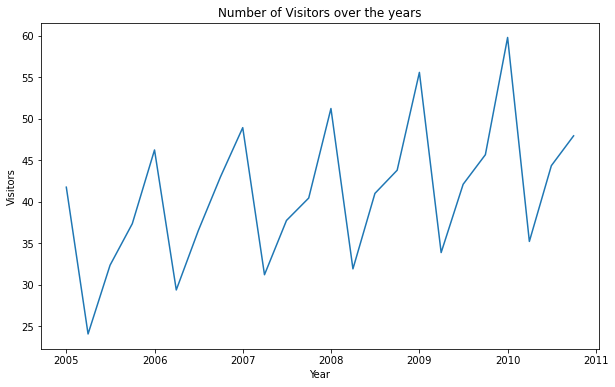

In [11]:
plt.figure(figsize=(10,6))
plt.plot(aust)
plt.xlabel('Year')
plt.ylabel('Visitors')
plt.title('Number of Visitors over the years')

Holt's Winters Seasonal Exponential Smoothing including a trend and seasonal component

fit1 with additive trend and additive seasonal model

fit2 with additive trend and multiplicative seasonal model

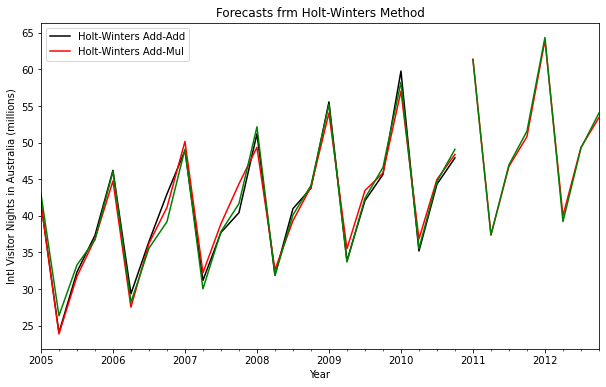

In [12]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', 
                            seasonal='add').fit()

fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', 
                            seasonal='mul').fit()

ax = aust.plot(figsize=(10,6), color='black', 
               title='Forecasts frm Holt-Winters Method')
ax.set_ylabel('Intl Visitor Nights in Australia (millions)')
ax.set_xlabel('Year')

fit1.fittedvalues.plot(ax=ax, color='red')
fit2.fittedvalues.plot(ax=ax, color='green')

fit1.forecast(8).rename("Holt-Winters Add-Add").plot(ax=ax, color='red',legend=True)
fit2.forecast(8).rename("Holt-Winters Add-Mul").plot(ax=ax, color='green',legend=True)

plt.show()

In [13]:
fit1.sse

53.72160629476602

In [14]:
fit2.sse

34.593705972840425

### ARIMA Model

#### Step 1: Checking for Stationarity

See plot and check if it looks like white noise
Stat test called Augmented Dickey-Fuller test

Text(0, 0.5, 'Number of Passengers')

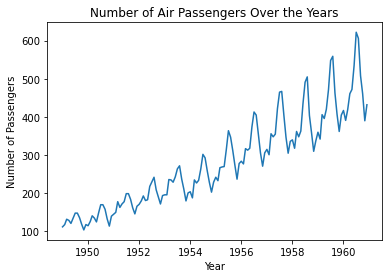

In [30]:
plt.plot(ts)
plt.title('Number of Air Passengers Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')

non-stationary

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
def test_stationarity(timeseries):
    print('Results of ADF Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                        index=['Test Statistic','p-value','#Lags Used',
                              'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [33]:
test_stationarity(ts)

Results of ADF Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Test Statistic is greater than critical values at all cnfidence intervals indicating data is non-stationary

#### Making data stationary

One trick is transformation. We see significant positive trend. So we can apply transformation which penalizes higher values more than smaller values/

Or differencing time-series data

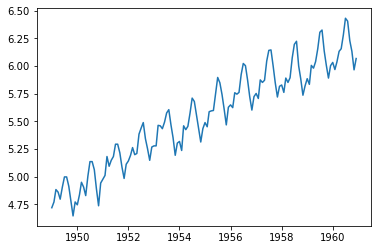

In [34]:
ts_log = np.log(ts)
plt.plot(ts_log)

In [35]:
ts_log_diff = ts_log.diff(periods=1)
ts_log_diff.head(8)

Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
Name: #Passengers, dtype: float64

In [36]:
ts_log_diff.dropna(inplace=True)

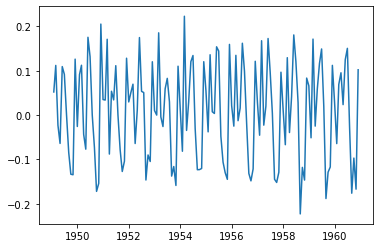

In [37]:
plt.plot(ts_log_diff)

In [38]:
test_stationarity(ts_log_diff)

Results of ADF Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


data becomes stationary

Order of differencing in ARIMA model is 1

#### Plot PACF and ACF

to get autocorrelation order p and moving average lag q respectively

In [39]:
from statsmodels.tsa.stattools import acf, pacf

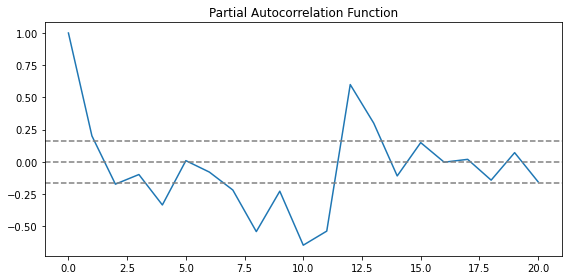

In [40]:
#PACF

lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')
plt.figure(figsize=(8,4))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

##1.96 critical value at 5% cf

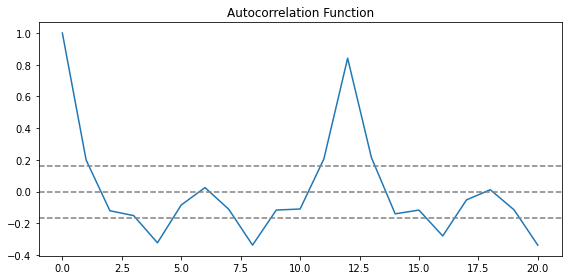

In [41]:
#ACF

lag_acf = acf(ts_log_diff, nlags=20)
plt.figure(figsize=(8,4))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.tight_layout()

The 2 dotted lines on either sides of 0 are confidence intervals. Used to determine p and q values

p -- lag value where PACF chart crosses the UCF for the first time. we see p=2

q -- lag value where ACF chart crosses the UCF for the first time. we see q=2

#### Build ARIMA Model

In [42]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
model = ARIMA(ts_log, order=(2,1,2)) 
#original data coz differencing parameter being passed as 1
results_ARIMA = model.fit()

C:\Users\Swastik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Swastik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


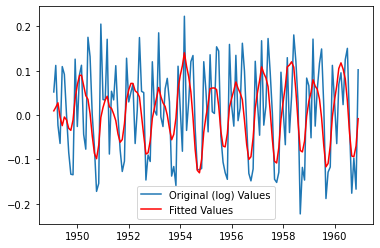

In [45]:
plt.plot(ts_log_diff, label='Original (log) Values')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values')
plt.legend()

#### Bringing back the data to normal scale

In [46]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64

Starts from Feb 49 coz of lag of 1 and the first element did not have anything to subtract from.

The way to convert the differencing to logged scale is to add these difference consecutively to the base number. Easy way to do it is to first determine the cumulative sum at index and add it to the base number.

In [47]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

Next we have to add them to the base number. For this we create a series with all values as base number and add the differences to it

In [48]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)

predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,
                                                 fill_value=0)

predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

Here the first element is the base number itself and from thereon the values cumulativelu added.

Last step is to take the exponent and compare with the original series

In [49]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

predictions_ARIMA.head()

Month
1949-01-01    112.000000
1949-02-01    113.078122
1949-03-01    115.073414
1949-04-01    118.301985
1949-05-01    117.768362
dtype: float64

Text(0.5, 1.0, 'RMSE: 90.1047')

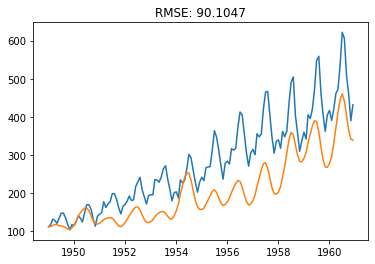

In [51]:
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

#### Forecasting for future time period

In [52]:
forecast = results_ARIMA.forecast(steps=36)[0]

In [53]:
forecast

array([6.09553382, 6.15281386, 6.22442949, 6.29241088, 6.34164711,
       6.36359364, 6.35784695, 6.33139316, 6.29597552, 6.26447721,
       6.24738326, 6.25025165, 6.27275824, 6.30940297, 6.35151478,
       6.38988643, 6.41727373, 6.4301105 , 6.42906688, 6.41842489,
       6.40456153, 6.3940361 , 6.39183073, 6.4001949 , 6.41833676,
       6.44295391, 6.46937419, 6.49293972, 6.51024107, 6.51989023,
       6.52267569, 6.52112377, 6.51864515, 6.51853675, 6.52311906,
       6.53322342])

In [54]:
#convert log values to actuals

In [55]:
forecast_actual = np.exp(forecast)

In [56]:
date_index = pd.date_range(start='1/1961', end='12/1963',
                          freq=pd.offsets.MonthBegin())
date_index

#next three years

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
               '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
               '1963-01-01', '1963-02-01', '1963-03-01', '1963-04-01',
               '1963-05-01', '1963-06-01', '1963-07-01', '1963-08-01',
               '1963-09-01', '1963-10-01', '1963-11-01', '1963-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [57]:
forecast_actual = pd.Series(forecast_actual, index=date_index)
forecast_actual.head()

1961-01-01    443.870929
1961-02-01    470.038152
1961-03-01    504.934888
1961-04-01    540.454732
1961-05-01    567.730655
Freq: MS, dtype: float64

In [58]:
updated_data = ts.append(forecast_actual)

In [59]:
updated_data.tail()

1963-08-01    679.341380
1963-09-01    677.659636
1963-10-01    677.586184
1963-11-01    680.698217
1963-12-01    687.611103
dtype: float64

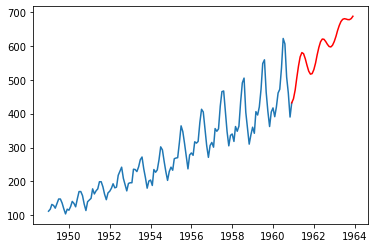

In [60]:
plt.plot(updated_data[:'1960'])
plt.plot(updated_data['1960-12-01':], color='red')